## Task 1

Computing area MC

* Monte-Carlo for heart: f(x, y) = (x^2 + y^2 - 1)^3 - x^2 * y^3 <= 0 (let's call the area A)

Steps:

1) Generate N points $(x_i, y_i)$ independently and uniformly over box B:

$$ (x_{i}, y_{i}) \overset{\text{i.i.d.}}{\sim} \mathrm{Uniform}, i = 1,...,N $$

2) Hit indicator for whether a point lies inside the heart:

$$ 
indicator_{i} = 
\begin{cases}
1, f(x_{i}, y_{i})\le 0 \\
0, otherwise
\end{cases}
$$

3) "True" hit probability: 

$$ p = A_{area}/B_{area}$$

but we don't know it, so we'll use estimator:

$$\hat{p} = 1/N * \sum_{i=1}^{N} indicator_{i}$$

4) $ \hat{A}_{area} = B_{area} * \hat{p} $ - estimated area of heart

5) Compute statistics:

$$ SE(\hat{A}_{area}) = B_{area} * \sqrt{\hat{p}(1 - \hat{p})/N} $$

95% CI (according to CLT + for big N):

$$ \hat{A}_{area} \pm 1.96 * SE(\hat{A}_{area})$$

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

Area estimated: 3.64500 (± 0.06123 for 95% CI)
Number of points inside: 8100 of 20000 (fraction 0.40500)
Box area: 9.00


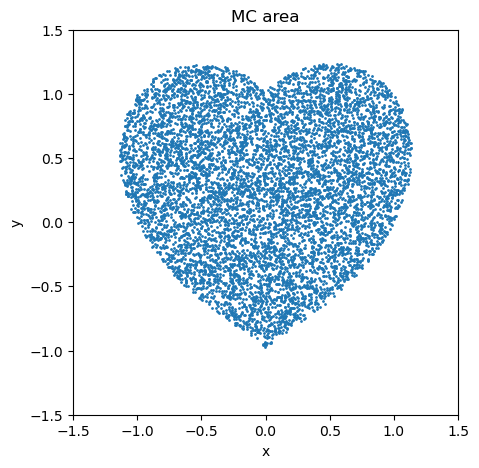

In [2]:
random.seed(0)

N = 20000          
plot_points = True 

def in_heart(x, y):
    f = (x*x + y*y - 1)**3 - (x*x) * (y**3)
    if f <= 0:
        return True
    else:
        return False
# Box
min_x, max_x = -1.5, 1.5
min_y, max_y = -1.5, 1.5
box_area = (max_x - min_x)*(max_y - min_y)

inside_points = 0
x_in, y_in = [], [] 

for _ in range(N):
    x = random.uniform(min_x, max_x)
    y = random.uniform(min_y, max_y)
    if in_heart(x, y):
        inside_points += 1
        if plot_points:
            x_in.append(x)
            y_in.append(y)

p_estimated = inside_points/N
area_search = box_area * p_estimated 
# Statistics (SE and CI):
std_err = box_area * np.sqrt(p_estimated * (1 - p_estimated) / N)

print(f"Area estimated: {area_search:.5f} (± {1.96*std_err:.5f} for 95% CI)")
print(f"Number of points inside: {inside_points} of {N} (fraction {p_estimated:.5f})")
print(f"Box area: {box_area:.2f}")

if plot_points:
    plt.figure(figsize=(5, 5))
    plt.scatter(x_in, y_in, s=1)
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("MC area")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

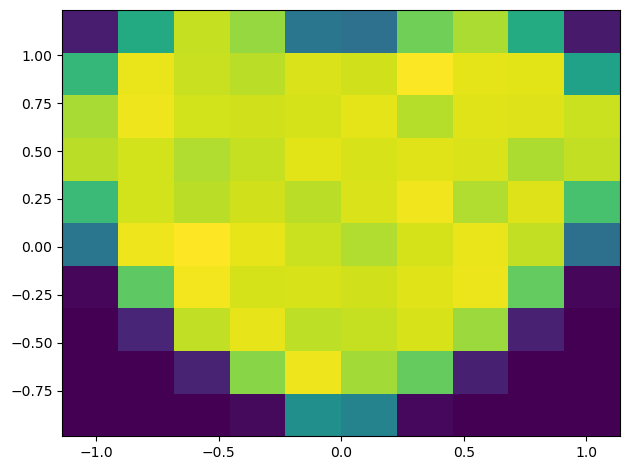

In [3]:

def in_heart(x, y):
    f = (x*x + y*y - 1)**3 - (x*x) * (y**3)
    if f <= 0:
        return True
    else:
        return False
# Box
min_x, max_x = -1.5, 1.5
min_y, max_y = -1.5, 1.5
box_area = (max_x - min_x)*(max_y - min_y)

N = 100000
inside_points = 0
x_in, y_in = [], [] 

for _ in range(N):
    x = random.uniform(min_x, max_x)
    y = random.uniform(min_y, max_y)
    if in_heart(x, y):
        inside_points += 1
        if plot_points:
            x_in.append(x)
            y_in.append(y)

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x_in, y_in, bins=(10,10))


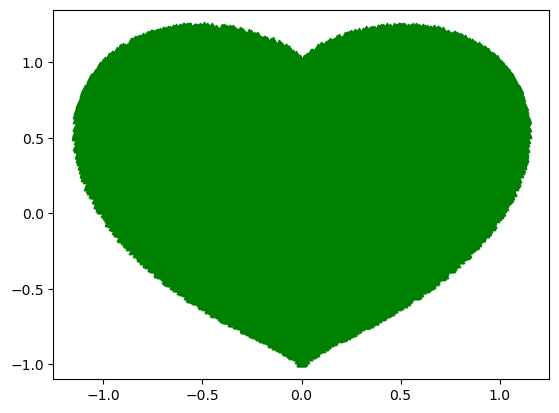

In [4]:
plt.scatter(x_in, y_in, marker='^', color='g')


In [18]:
def make_points(n_points, nrange=[0, 1]):
    """
    Points generator

    Input
    -----
    n_point: int, the number of points

    Output
    ------
    list of float, x coordinates between 0 and 1
    list of float, y coordinates between 0 and 1
    """
    x, y = [], []
    for i in range(n_points):
        x.append(random.uniform(nrange[0], nrange[1]))
        y.append(random.uniform(*nrange))
    return x, y

In [19]:
def in_target(x, y, obj_type="square"):
    """
    Check if a given point is inside an object

    Input
    ----
    x: float, x position
    y: float, y position
    obj_type: str, the object to target
    
    Output
    ------
    True if inside, False otherwise
    """
    if obj_type == "square":
        return x < 1 and y < 1
    if obj_type == "circle":
        return math.sqrt((x-0.5)**2 + (y-0.5)**2) < 0.5
    if obj_type == "unknown": 
        x = x*3 - 1.5 
        y = y*3 - 1.5
        return ((x*x + y*y - 1)**3 - (x*x) * (y**3))  < 0


0.4075


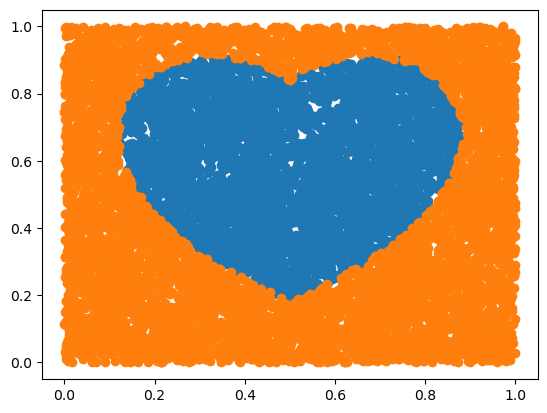

In [20]:
number_points = 10000
x, y = make_points(number_points)
x_in, y_in = [], []
x_out, y_out = [], []

for ix, iy in zip(x, y): 
    if in_target(ix, iy, obj_type="unknown"):
        x_in.append(ix)
        y_in.append(iy)
    else:
        x_out.append(ix)
        y_out.append(iy)
        
plt.scatter(x_in, y_in) 
plt.scatter(x_out, y_out)

area = 1*1*len(x_in)/len(x)
print(area)

In [21]:
n_trials = 100000
number_points = 3
avgs = []
for it in range(n_trials):
    avg = 0
    x, _ = make_points(number_points)
    for ix in x:
        avg += ix
    avg /= len(x)
    avgs.append(avg)


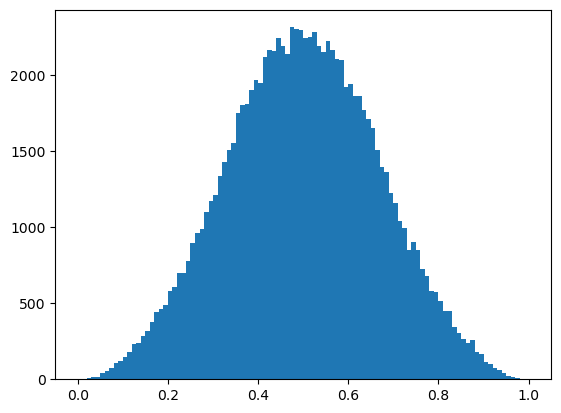

In [22]:
count = plt.hist(avgs, bins=100, range=(0, 1))

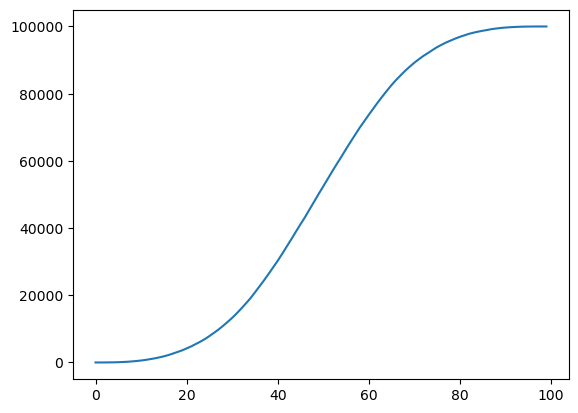

In [23]:
cavg = np.cumsum(count[0])
plt.plot(cavg)

# Bday Paradox

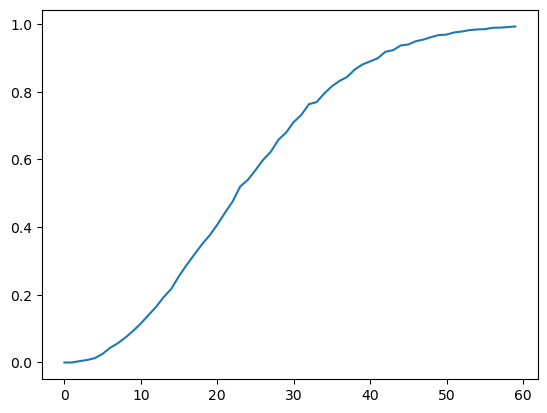

In [76]:
 
n_people = 60
trials = 10000
counter = []

for n in range(n_people):
    match = 0        
    for _ in range(trials):
        x, _ = make_points(n, nrange=[0, 365])
        x = [int(o) for o in x]    
        unique_x = set(x)
        if len(unique_x) != len(x):
            match += 1
    counter.append(match/trials)
 
plt.plot(counter)
    

## Task 2

V_B = V_m + V_empty

Computing volume MC

* Monte-Carlo for DNA volume

Given:

1) types, masses, and coordinates of atom

2) Van-der-Waals radii for each atom type

3) DNA is represented as the union of spheres:

$$
DNA = \bigcup_{j=1}^{M} 
\left\{
\vec{x} \in \mathbb{R}^3 : 
\|\vec{x} - \vec{a}_j\| \le r_j^{vdw}
\right\}
$$

Each set in brackets represents the sphere of atom j. 

In order to check whether the point $(x_i, y_i, z_i)$ belongs to the molecule, we compute the distance to each atom:

$$ d_{j} = ||\vec{x} - \vec{a_{j}}||$$

where $\vec{a}_{j}$ is the center of atom j. The point is inside the molecule if, for at least one atom:

$$ d_{j} \le r_j^{vdw}$$


Steps:

1) Through N points $(x_i, y_i, z_i)$ independently and uniform over box B:

$$ (x_{i}, y_{i}, z_{i}) \overset{\text{i.i.d.}}{\sim} \mathrm{Uniform}(B), i = 1,...,N $$

2) Hit indicator:

$$ 
indicator_{i} = 
\begin{cases}
1, \text{if the point falls inside the union of spheres} \\
0, otherwise
\end{cases}
$$

3) "True" hit probability: 

$$ p = V_{DNA}/V_{B}$$

but we don't know it, so we'll use estimator:

$$\hat{p} = 1/N * \sum_{i=1}^{N} indicator_{i}$$

4) $ \hat{V}_{DNA} = V_{B} * \hat{p} $ - estimated volume of molecula

5) Compute statistics:

$$ SE(\hat{V}_{DNA}) =V_{B} * \sqrt{\hat{p}(1 - \hat{p})/N} $$

95% CI (according to CLT + for big N):

$$ \hat{V}_{DNA} \pm 1.96 * SE(\hat{V}_{DNA})$$

6) Volume of emptiness: $V_{empty} = V_{B} - \hat{V}_{DNA}$

In [11]:
# element, mass, coordinates
atoms = [
    ("P", 30.9738,   0.0,   0.0,  0.0),
    ("P", 30.9738,   5.5,   0.0,  0.0),
    ("O", 15.999,    2.5,   2.0,  0.8),
    ("O", 15.999,    3.0,  -2.2, -0.6),
    ("C", 12.0107,   1.0,   3.2,  0.0),
    ("C", 12.0107,   4.2,   1.1,  1.2),
    ("N", 14.0067,   1.2,  -3.0,  0.9),
    ("N", 14.0067,   4.6,  -1.5, -1.1),
    ("O", 15.999,    0.5,   0.8,  2.1),
    ("C", 12.0107,   5.8,   0.6,  2.0),
    ("H", 1.0079,    2.2,   3.8,  1.6),
    ("H", 1.0079,    4.9,  -2.6, -1.9),
]

VDW_RADIUS = {"H":1.20, "C":1.70, "N":1.55, "O":1.52, "P":1.80, "S":1.80} # Å

elems  = np.array([e for e,_,_,_,_ in atoms])
coords = np.array([(x,y,z) for _,_,x,y,z in atoms], dtype=float)
r_vdw = np.array([VDW_RADIUS[e] for e in elems], dtype=float)

# Box
reserve = 4
mins = coords.min(axis=0) - reserve
print(mins)
maxs = coords.max(axis=0) + reserve
print(maxs)
box_size = maxs - mins 
dx, dy, dz = (maxs - mins) 
V_B = dx * dy * dz

print(f"Number of atoms: {len(atoms)}")
print(f"Box: mins={mins}, maxs={maxs}, V_B={V_B}")

def point_in_union_spheres(point, centers, radii): # check if the point fall into the union of spheres
    px, py, pz = point
    for (cx, cy, cz), r in zip(centers, radii):
        dx = px - cx; dy = py - cy; dz = pz - cz
        if dx*dx + dy*dy + dz*dz <= r*r:
            return True
    return False

def mc(centers, radii, mins, maxs, V_B, N=200000, seed=0):
    random.seed(seed)
    inside = 0
    for _ in range(N):
        x = random.uniform(mins[0], maxs[0])
        y = random.uniform(mins[1], maxs[1])
        z = random.uniform(mins[2], maxs[2])
        if point_in_union_spheres((x, y, z), centers, radii):
            inside += 1
    p = inside / N 
    V = V_B * p
    SE = V_B * np.sqrt(p * (1 - p) / N)
    CI = (V - 1.96 * SE, V + 1.96 * SE)
    return V, SE, CI, p

N = 200000
V_hat, SE, ci95, p_hat = mc(coords, r_vdw, mins, maxs, V_B = V_B, N=N, seed=0)

print(f"N = {N}")
print(f"Hit fraction (p_estimated) = {p_hat:.6f}")
print(f"V_DNA_estimated = {V_hat:.2f} Å^3")
print(f"SE = {SE:.2f} Å^3")
print(f"95% CI: [{ci95[0]:.2f}, {ci95[1]:.2f}] Å^3")
print(f"V_emptiness: {V_B - V_hat:.2f} Å^3")

[-4.  -7.  -5.9]
[9.8 7.8 6.1]
Number of atoms: 12
Box: mins=[-4.  -7.  -5.9], maxs=[9.8 7.8 6.1], V_B=2450.88
N = 200000
Hit fraction (p_estimated) = 0.066520
V_DNA_estimated = 163.03 Å^3
SE = 1.37 Å^3
95% CI: [160.36, 165.71] Å^3
V_emptiness: 2287.85 Å^3
